# 1. Agriculture & Rural Development - Greece

The “Greece – Agriculture and Rural Development Data” dataset sourced from the __[World Bank’s data portal](https://data.humdata.org/dataset/world-bank-agriculture-and-rural-development-indicators-for-greece)__, provides information about machinery, production, employment and cropland changes in Greece. The initial raw data contains 6 columns and 1752 samples, but we will transform the raw dataset into a format more suitable for analysis.

## 1.1. Import packages and classes

We will start by including the *pandas* library for data manipulation. We aslo use the *set_option()* to set the maximum number of printable columns to 6. This is just for presentation purposes of this notebook. We also include the *matplotlib* library to create plots and get some better insights of our data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 6)

## 1.2. Load data

We can now use the *read_csv()* function to load the dataset as a pandas *DataFrame*. We also use the *info()* function to view some basic information about the dataset like the type of each column, the number of non-Null values, etc.

In [2]:
data_raw = pd.read_csv('./agriculture-and-rural-development_grc_raw.csv')
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    1752 non-null   object
 1   Country ISO3    1752 non-null   object
 2   Year            1752 non-null   object
 3   Indicator Name  1752 non-null   object
 4   Indicator Code  1752 non-null   object
 5   Value           1752 non-null   object
dtypes: object(6)
memory usage: 82.2+ KB


From the summary information we can learn that the dataset has 1752 samples (rows) and 6 variables (columns). In addition, there are no *NaN* values in any of the columns and all columns are of type *'object'*. <br>
Using the *head()* function, we can view some rows of the dataset just to visualize the the dataset actually looks like.

In [3]:
data_raw.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Greece,GRC,2006,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,259613
2,Greece,GRC,2005,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,259766
3,Greece,GRC,2004,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,258476
4,Greece,GRC,2003,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,257737


## 1.3. Clean & Transform

We continue by cleaning our data and also transforming it to the desired format. We start by dropping the first row of the dataset, as it contains the column names.

In [4]:
data_raw = data_raw.drop(index=0)

Now, ee want to use the 'Indicator Name' variable as our features and the rest of the columns as the values. So, we use the *pivot()* pandas function to reshape the dataframe properly. We use the *'Year'* column for the index, the *'Indicator Name'* for the column names and the *'Value'* column for the actual data. Again, using the *info()* and the *head()* functions, we view the summary and visualize the transformed dataset.

In [5]:
data = data_raw.pivot(index='Year', columns="Indicator Name", values="Value")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 1960 to 2021
Data columns (total 42 columns):
 #   Column                                                                                      Non-Null Count  Dtype 
---  ------                                                                                      --------------  ----- 
 0   Access to electricity, rural (% of rural population)                                        31 non-null     object
 1   Agricultural irrigated land (% of total agricultural land)                                  14 non-null     object
 2   Agricultural land (% of land area)                                                          58 non-null     object
 3   Agricultural land (sq. km)                                                                  58 non-null     object
 4   Agricultural machinery, tractors                                                            46 non-null     object
 5   Agricultural machinery, tractors per 100 sq. km of a

In [6]:
data.head()

Indicator Name,"Access to electricity, rural (% of rural population)",Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),...,Rural population growth (annual %),Rural population living in areas where elevation is below 5 meters (% of total population),Surface area (sq. km)
Year,,,,,,,
1960,NaN,NaN,NaN,...,NaN,NaN,NaN
1961,NaN,NaN,69.1233514352211,...,-0.387316115589497,NaN,131960
1962,NaN,NaN,69.0612878200155,...,-1.46214309229061,NaN,131960
1963,NaN,NaN,69.9844840961986,...,-1.71827774104949,NaN,131960
1964,NaN,NaN,69.7517455391777,...,-1.75891977162161,NaN,131960


Out of curiocity we can also calculate the percentage of *NaN* values in each column by using the *isna()* and *sum()* functions.

In [7]:
100*data.isna().sum() / data.shape[0]

Indicator Name
Access to electricity, rural (% of rural population)                                          50.000000
Agricultural irrigated land (% of total agricultural land)                                    77.419355
Agricultural land (% of land area)                                                             6.451613
Agricultural land (sq. km)                                                                     6.451613
Agricultural machinery, tractors                                                              25.806452
Agricultural machinery, tractors per 100 sq. km of arable land                                25.806452
Agricultural methane emissions (% of total)                                                   37.096774
Agricultural methane emissions (thousand metric tons of CO2 equivalent)                       51.612903
Agricultural nitrous oxide emissions (% of total)                                             37.096774
Agricultural nitrous oxide emissions (thousand me

## 1.4 Plots

In this section we will use the matplotlib library to create some plots that will help us better understand our data. By harnessing the power of these visualizations, we open the door to invaluable insights and gain a profound understanding of our data, empowering us to navigate its intricacies with newfound clarity and precision. 

We start by ploting the "Land under cereal production (hectares)" variable with respect to time. In our data, the time only holds the year information and it is used for indexing. 

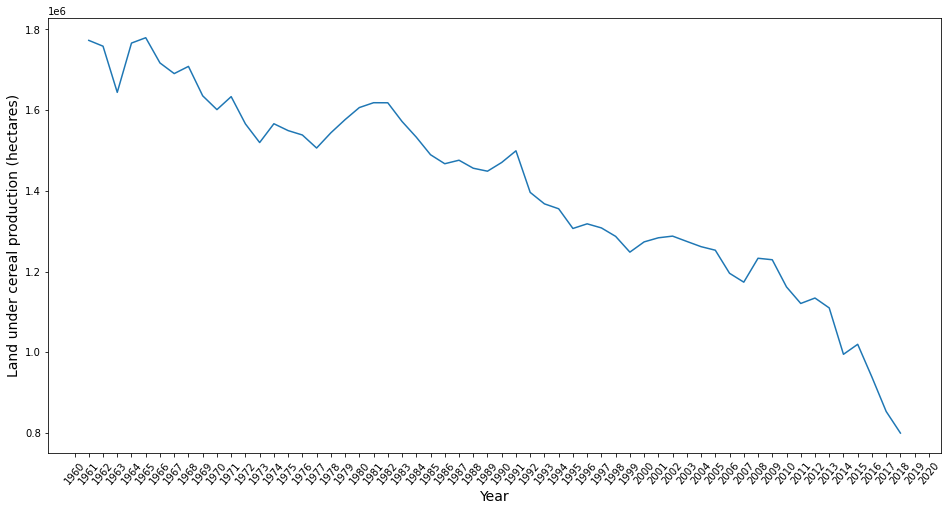

In [12]:
plt.figure(figsize=(16,8))
plt.plot(data.index, data["Land under cereal production (hectares)"])
plt.xticks(rotation = 50)

plt.ylabel("Land under cereal production (hectares)", fontsize=14)
plt.xlabel("Year", fontsize=14)

plt.show()

We can clearly see a decling trend in the hectares of land that are used to cultivate cereal in Greece.

Out of curiocity we will also plot the "Cereal production (metric tons)" variable to see how the production is performing as the arable land decreases.

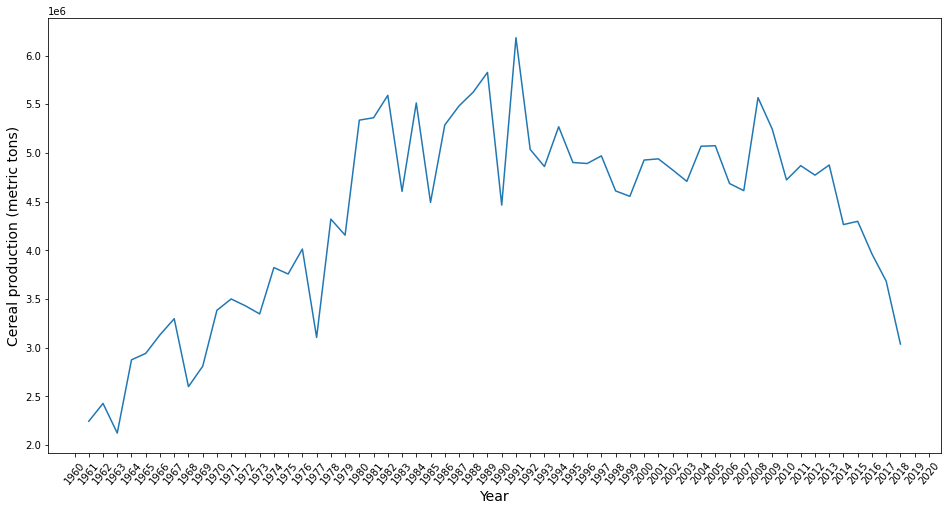

In [11]:
plt.figure(figsize=(16,8))
plt.plot(data.index, data["Cereal production (metric tons)"])
plt.xticks(rotation = 50)

plt.ylabel("Cereal production (metric tons)", fontsize=14)
plt.xlabel("Year", fontsize=14)

plt.show()

Although the land under production decreases until 1991, we observe that the actual production increases. This changes after 1991 and especially after 2008, where the production drops drastically each year. 

## 1.5. Store Dataset

We can now save the transformed dataframe as a csv file using the  𝑡𝑜_𝑐𝑠𝑣()  pandas function.

In [10]:
data.to_csv("./agriculture-and-rural-development_grc.csv")